In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [2]:
df1 = pd.read_csv(r"C:\Users\Aidan\Documents\GitHub\WarWatch\Usable Data\DataNoPopulationClass.csv")
df2 = pd.read_csv(r"C:\Users\Aidan\Documents\GitHub\WarWatch\Usable Data\DataNoPopulationRegr.csv")
df3 = pd.read_csv(r"C:\Users\Aidan\Documents\GitHub\WarWatch\Usable Data\DataWithPopulationRegr.csv")
df4 = pd.read_csv(r"C:\Users\Aidan\Documents\GitHub\WarWatch\Usable Data\DataWithPopulationClass.csv")

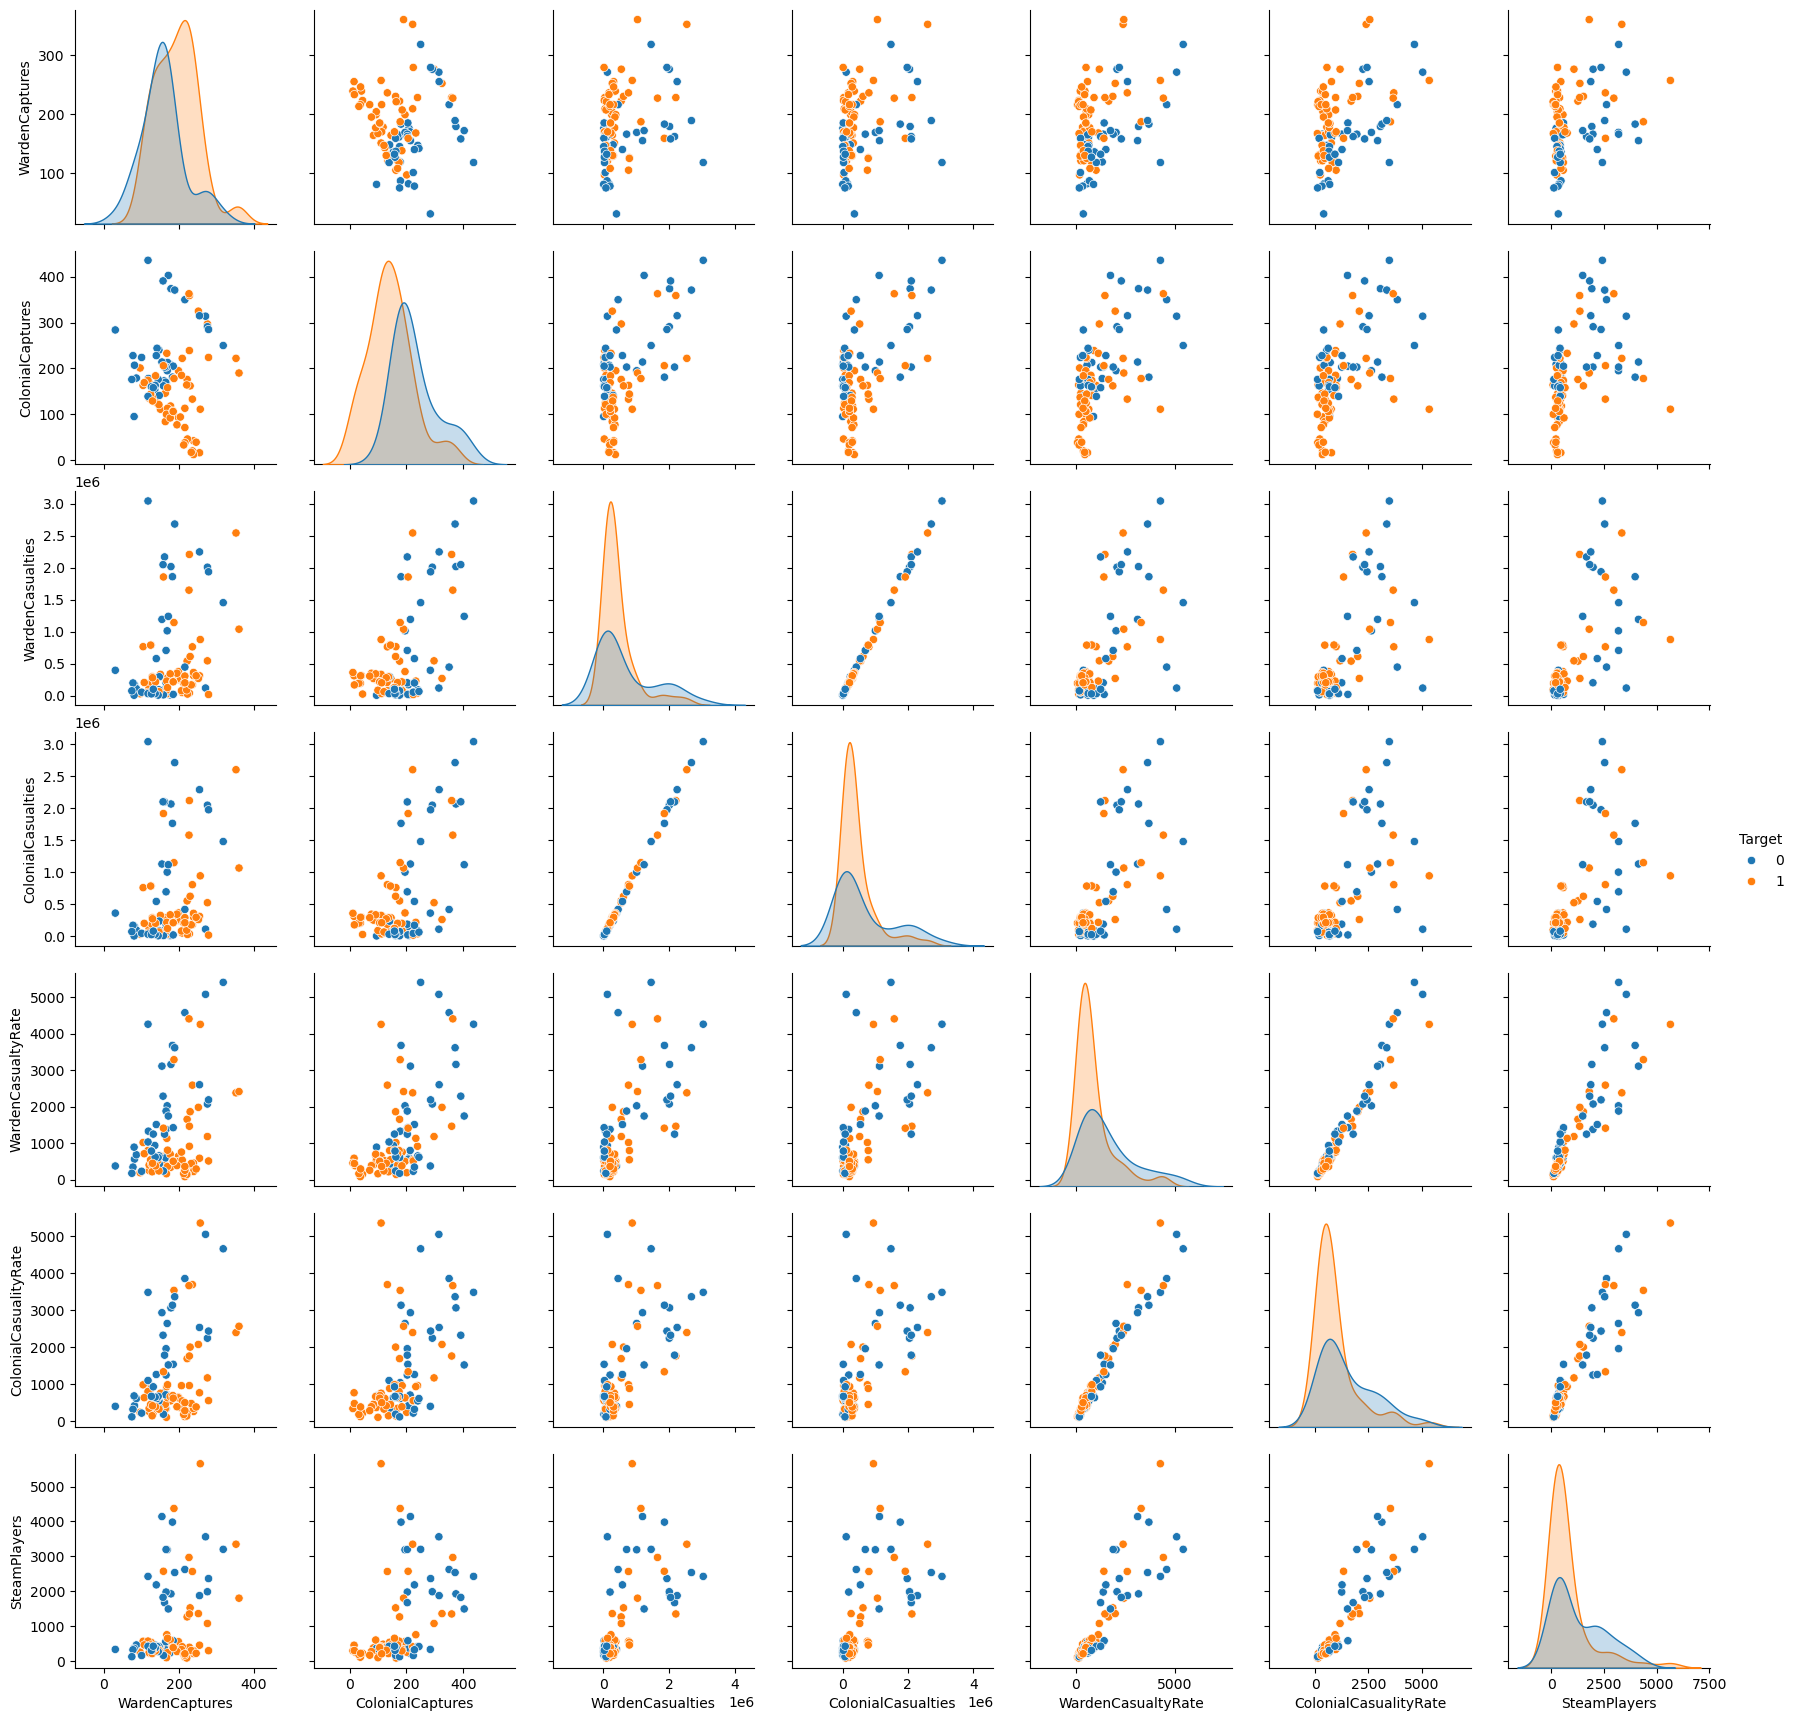

In [3]:
# --- Step 1: Create a smaller, random sample of the data ---
df_sample1 = df1.sample(n=100)

# --- Step 2: Drop 'WarNumber' and 'Timestamp' from the sample ---
df_for_plot1 = df_sample1.drop(columns=['WarNumber', 'Timestamp'])

# --- Step 3: Generate the pair plot using the smaller sample ---
sns.pairplot(df_for_plot1, hue='Target')
plt.show()

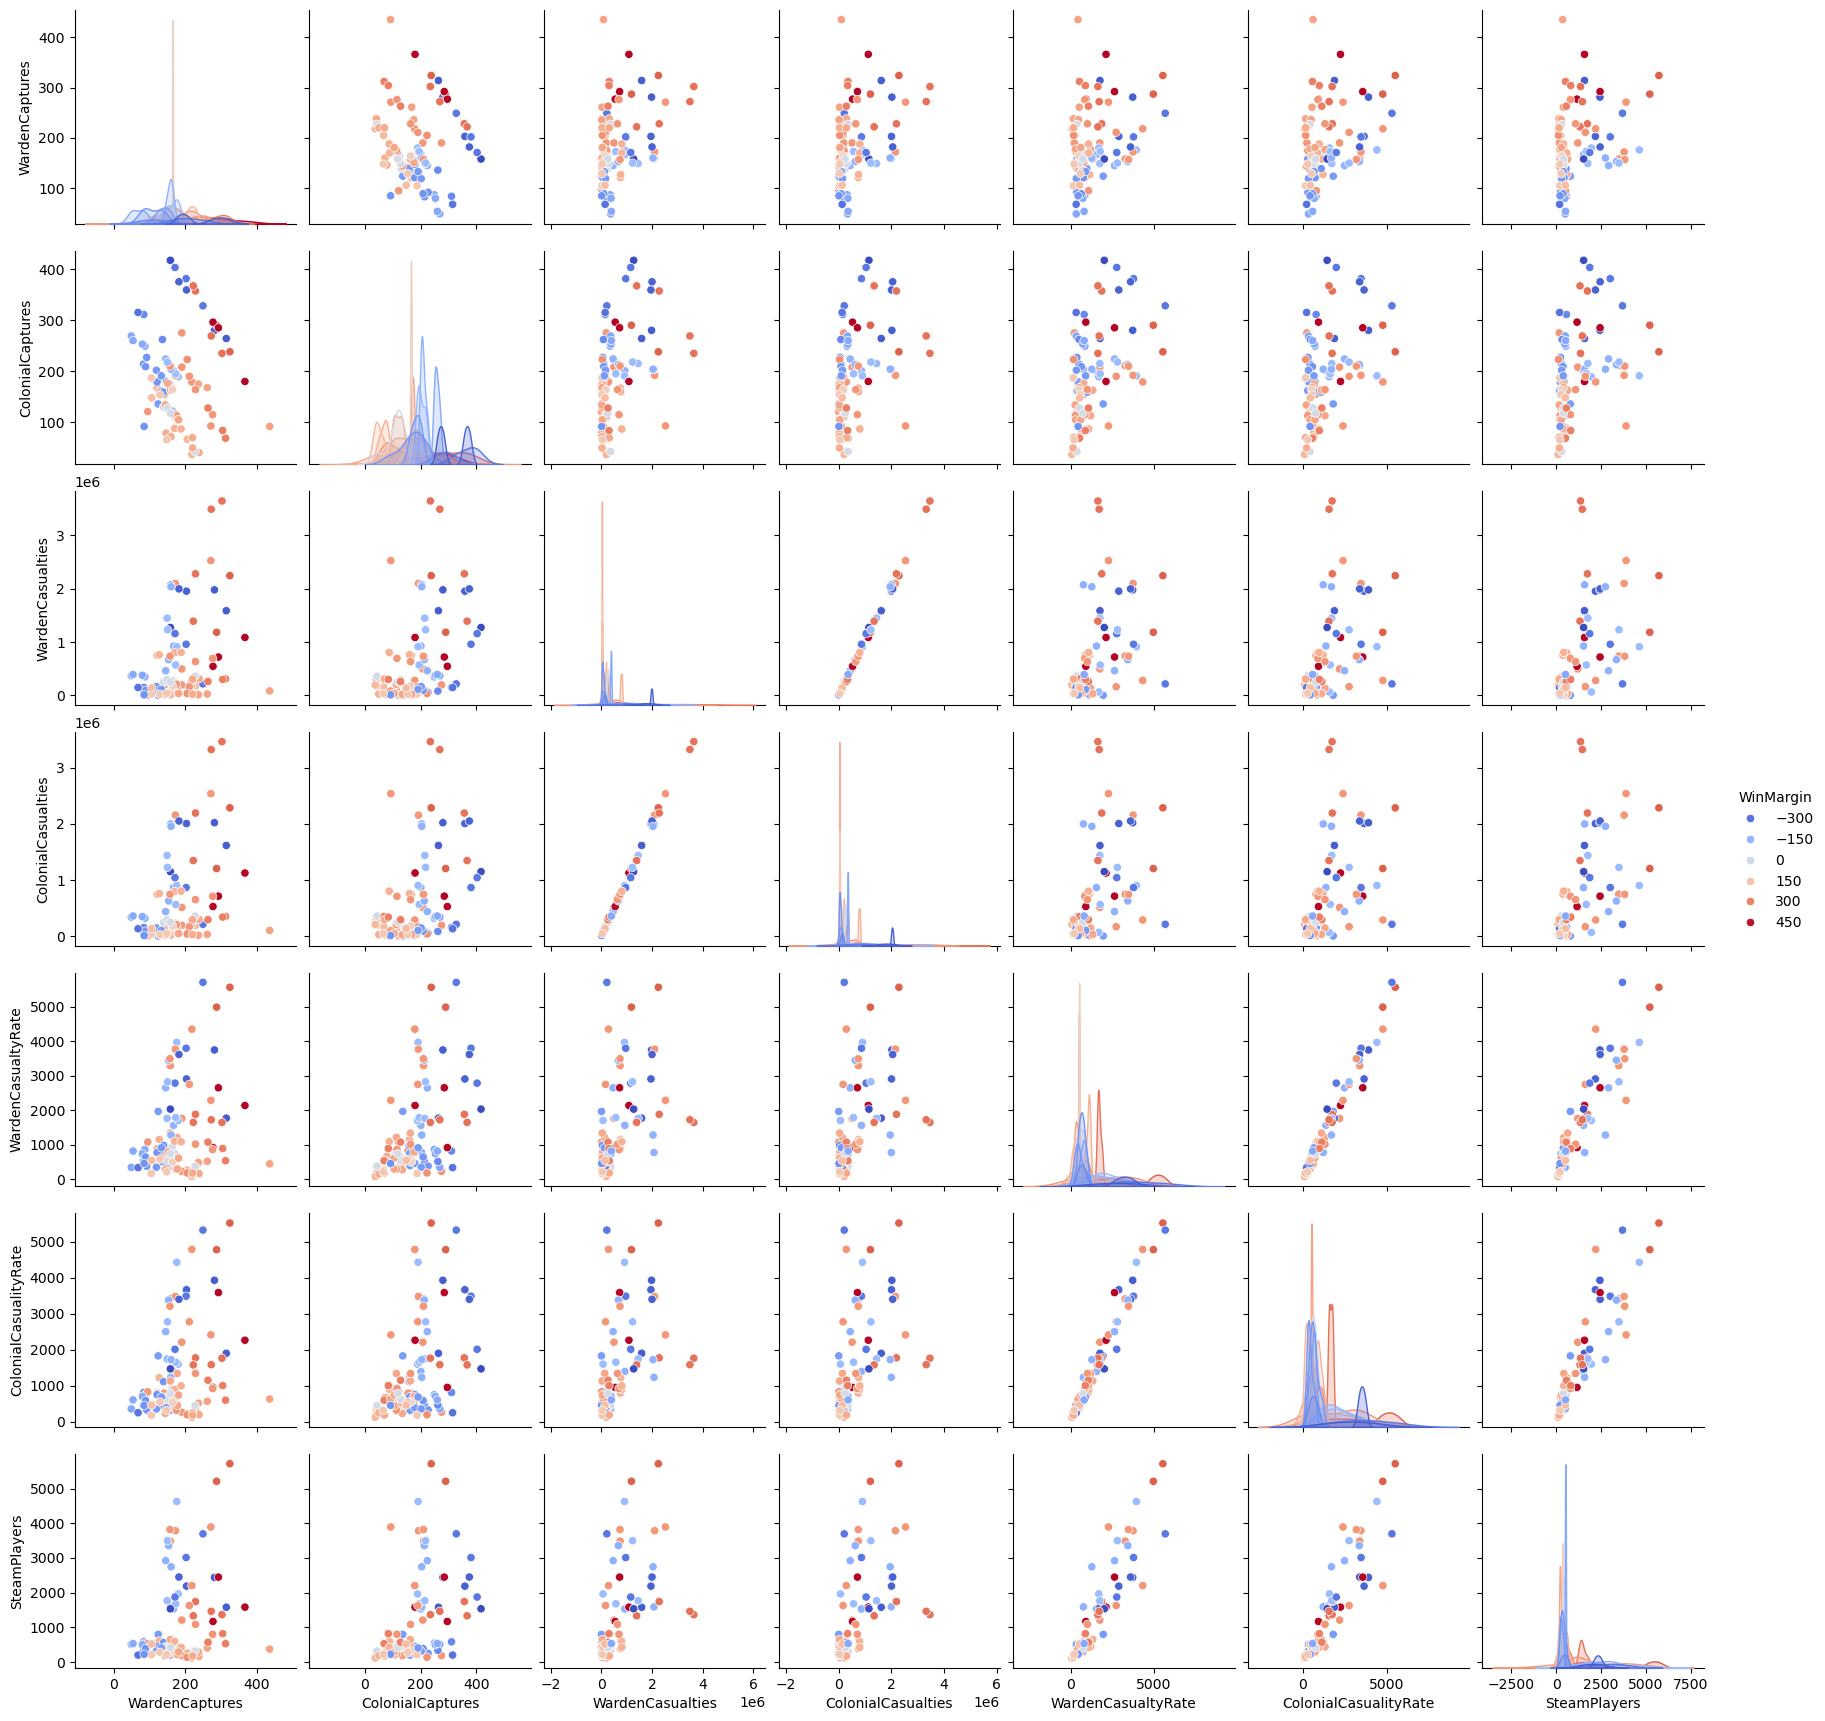

In [4]:
# --- Step 1: Create a smaller, random sample of the data ---
df_sample2 = df2.sample(n=100)

# --- Step 2: Drop 'WarNumber' and 'Timestamp' from the sample ---
df_for_plot2 = df_sample2.drop(columns=['WarNumber', 'Timestamp'])

# --- Step 3: Generate the pair plot using the smaller sample ---
sns.pairplot(df_for_plot2, hue='WinMargin', palette='coolwarm')
plt.show()

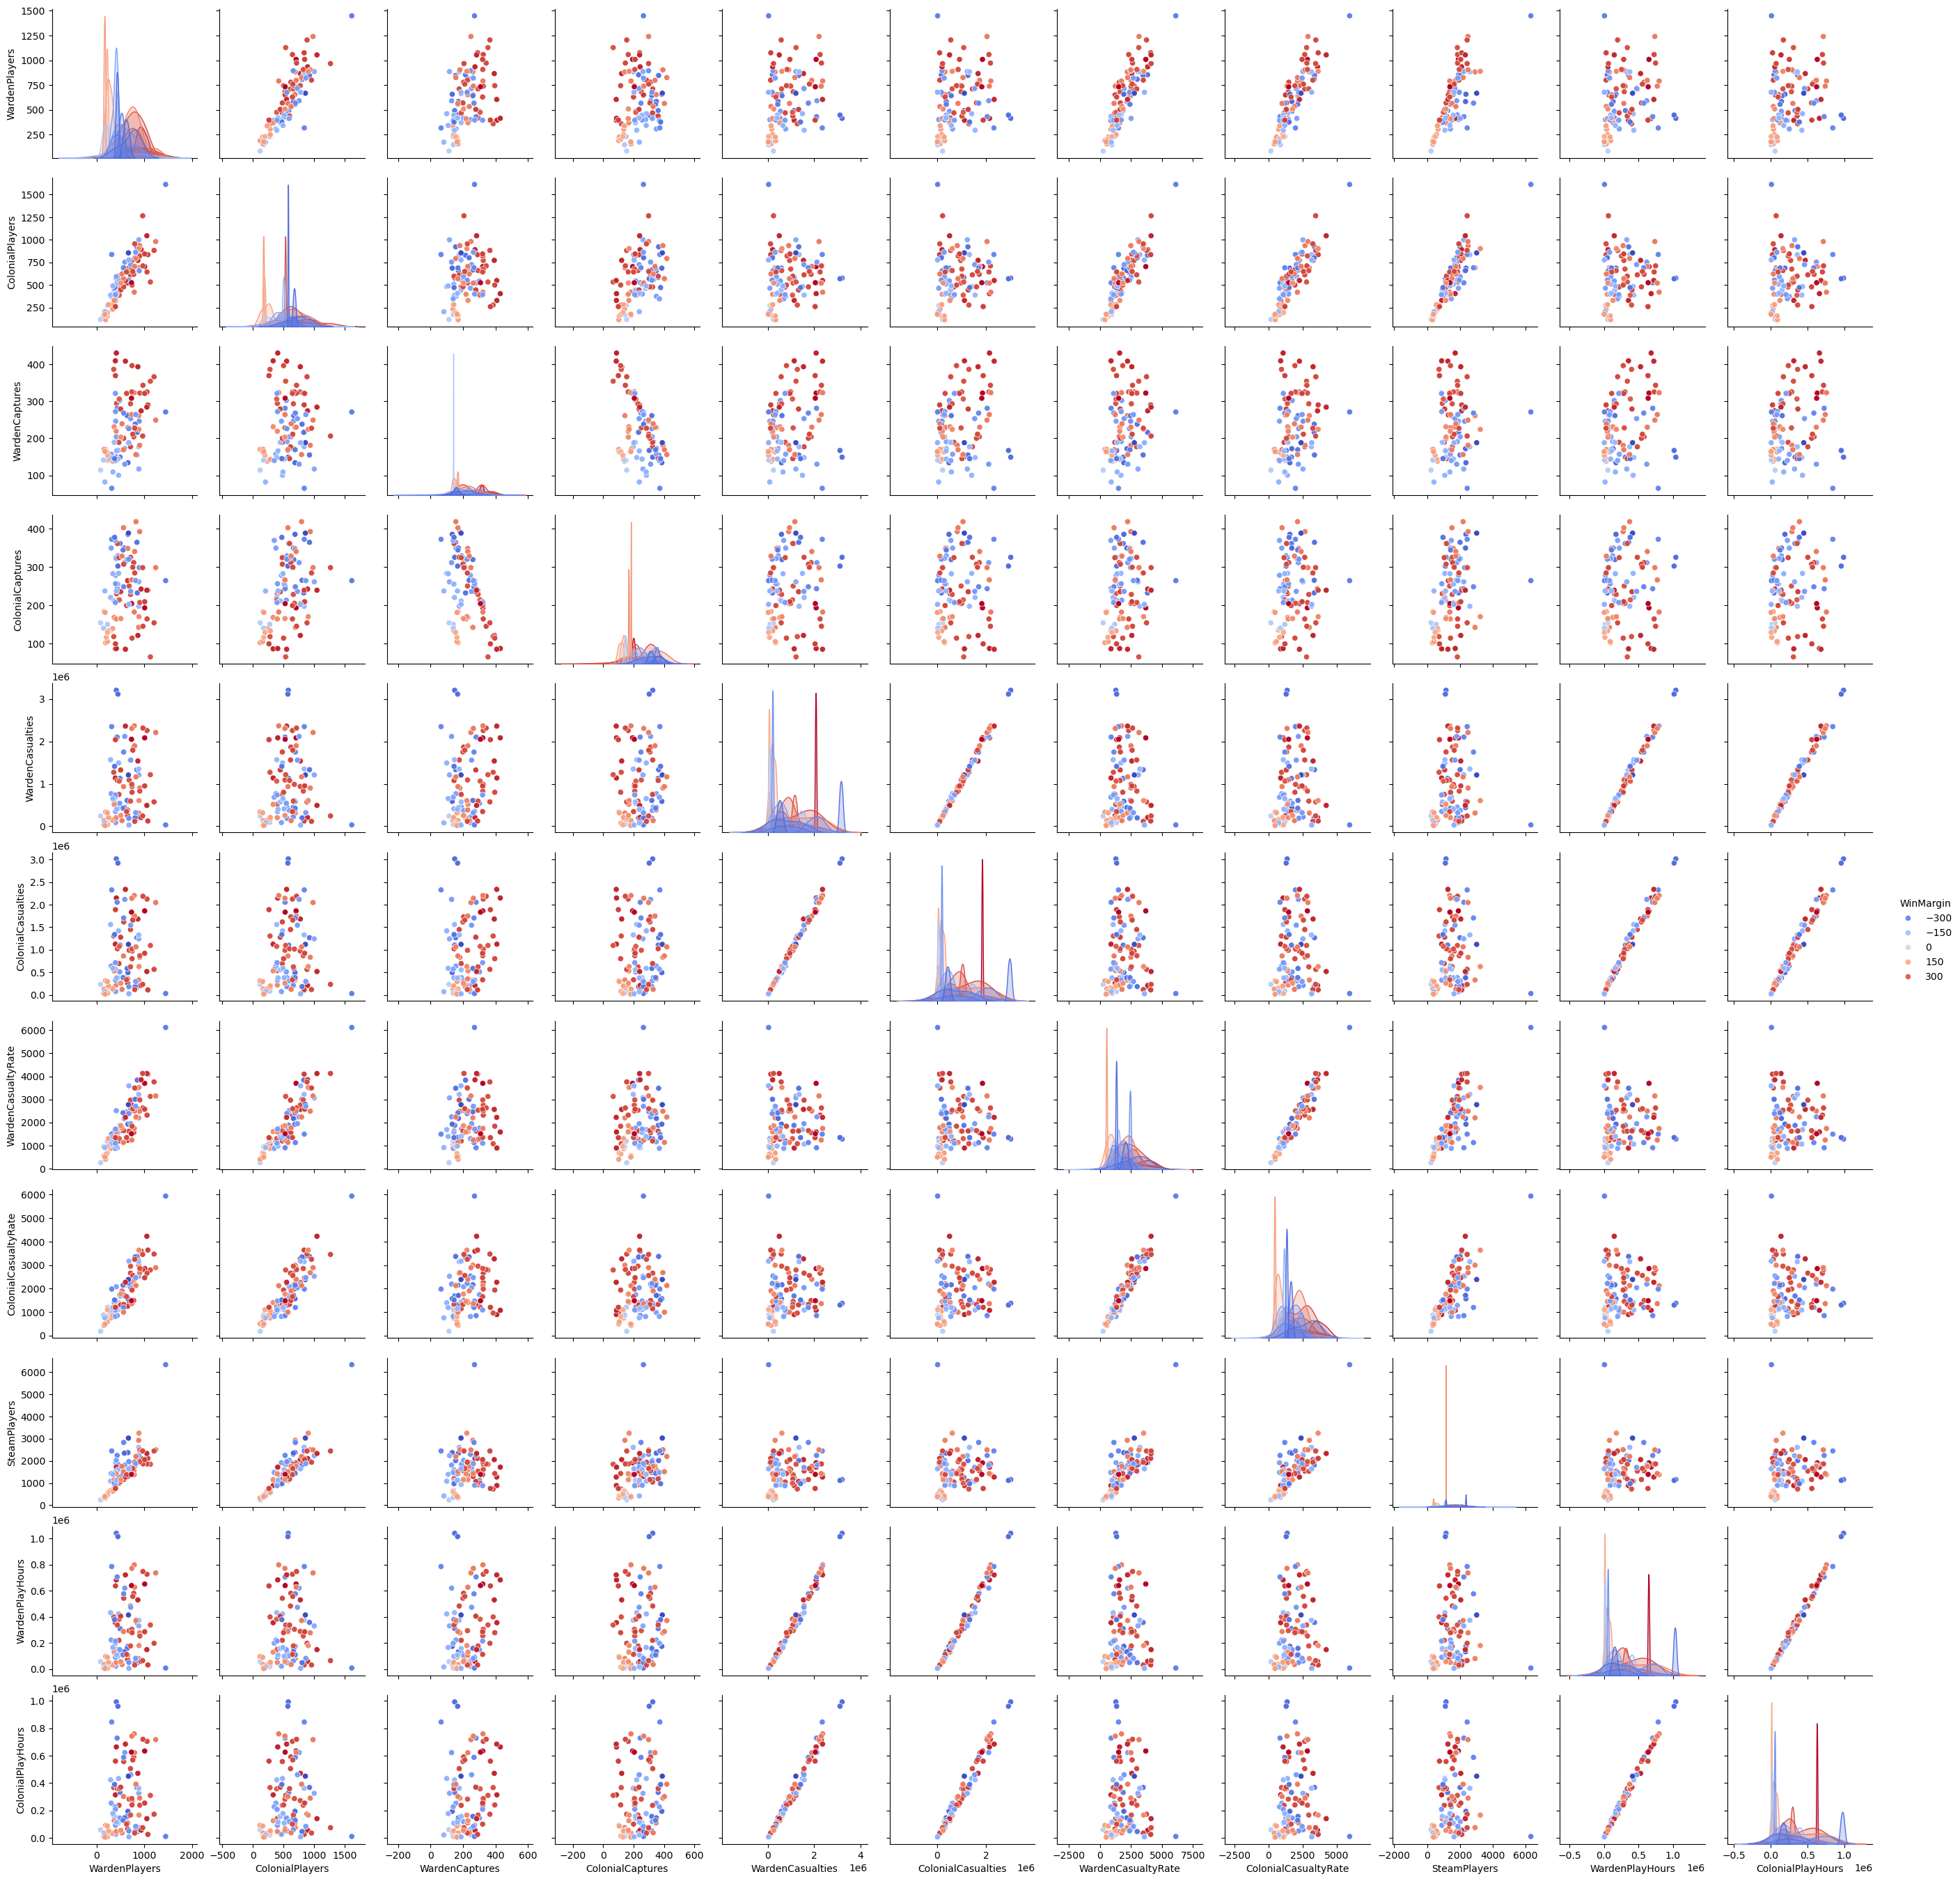

In [5]:
# --- Step 1: Create a smaller, random sample of the data ---
df_sample3 = df3.sample(n=100)

# --- Step 2: Drop 'WarNumber' and 'Timestamp' from the sample ---
df_for_plot3 = df_sample3.drop(columns=['WarNumber', 'Timestamp'])

# --- Step 3: Generate the pair plot using the smaller sample ---
sns.pairplot(df_for_plot3, hue='WinMargin', palette='coolwarm')
plt.show()

In [6]:
# Calculate and add the new difference columns
df4['CasualtyRateDifference'] = df4['WardenCasualtyRate'] - df4['ColonialCasualtyRate']
df4['PlayerDifference'] = df4['WardenPlayers'] - df4['ColonialPlayers']
df4['CasualtyDifference'] = df4['WardenCasualties'] - df4['ColonialCasualties']

# Display the first few rows to verify the new columns
print("DataFrame with all new difference columns:")
df4.head()

DataFrame with all new difference columns:


WarNumber            Timestamp  WardenPlayers  ColonialPlayers  \
0         63  2020-10-26 10:15:02            398              317   
1         63  2020-10-26 10:45:02            482              413   
2         63  2020-10-26 11:16:01            508              443   
3         63  2020-10-26 11:46:02            505              434   
4         63  2020-10-26 12:17:01            479              419   

   WardenCaptures  ColonialCaptures  WardenCasualties  ColonialCasualties  \
0             129               112               167                 228   
1             148               133              1664                1635   
2             148               144              3066                3111   
3             152               143              4387                4643   
4             152               142              5830                6102   

   WardenCasualtyRate  ColonialCasualtyRate  SteamPlayers  WardenPlayHours  \
0                  84                    96           841                0   
1                 735                   781           997              241   
2                2899                  2883          1041              503   
3                2723                  3008          1030              755   
4                2772                  3034           987             1003   

   ColonialPlayHours  Target  CasualtyRateDifference  PlayerDifference  \
0                  0       1                     -12                81   
1                206       1                     -46                69   
2                435       1                      16                65   
3                652       1                    -285                71   
4                868       1                    -262                60   

   CasualtyDifference  
0                 -61  
1                  29  
2                 -45  
3                -256  
4                -272

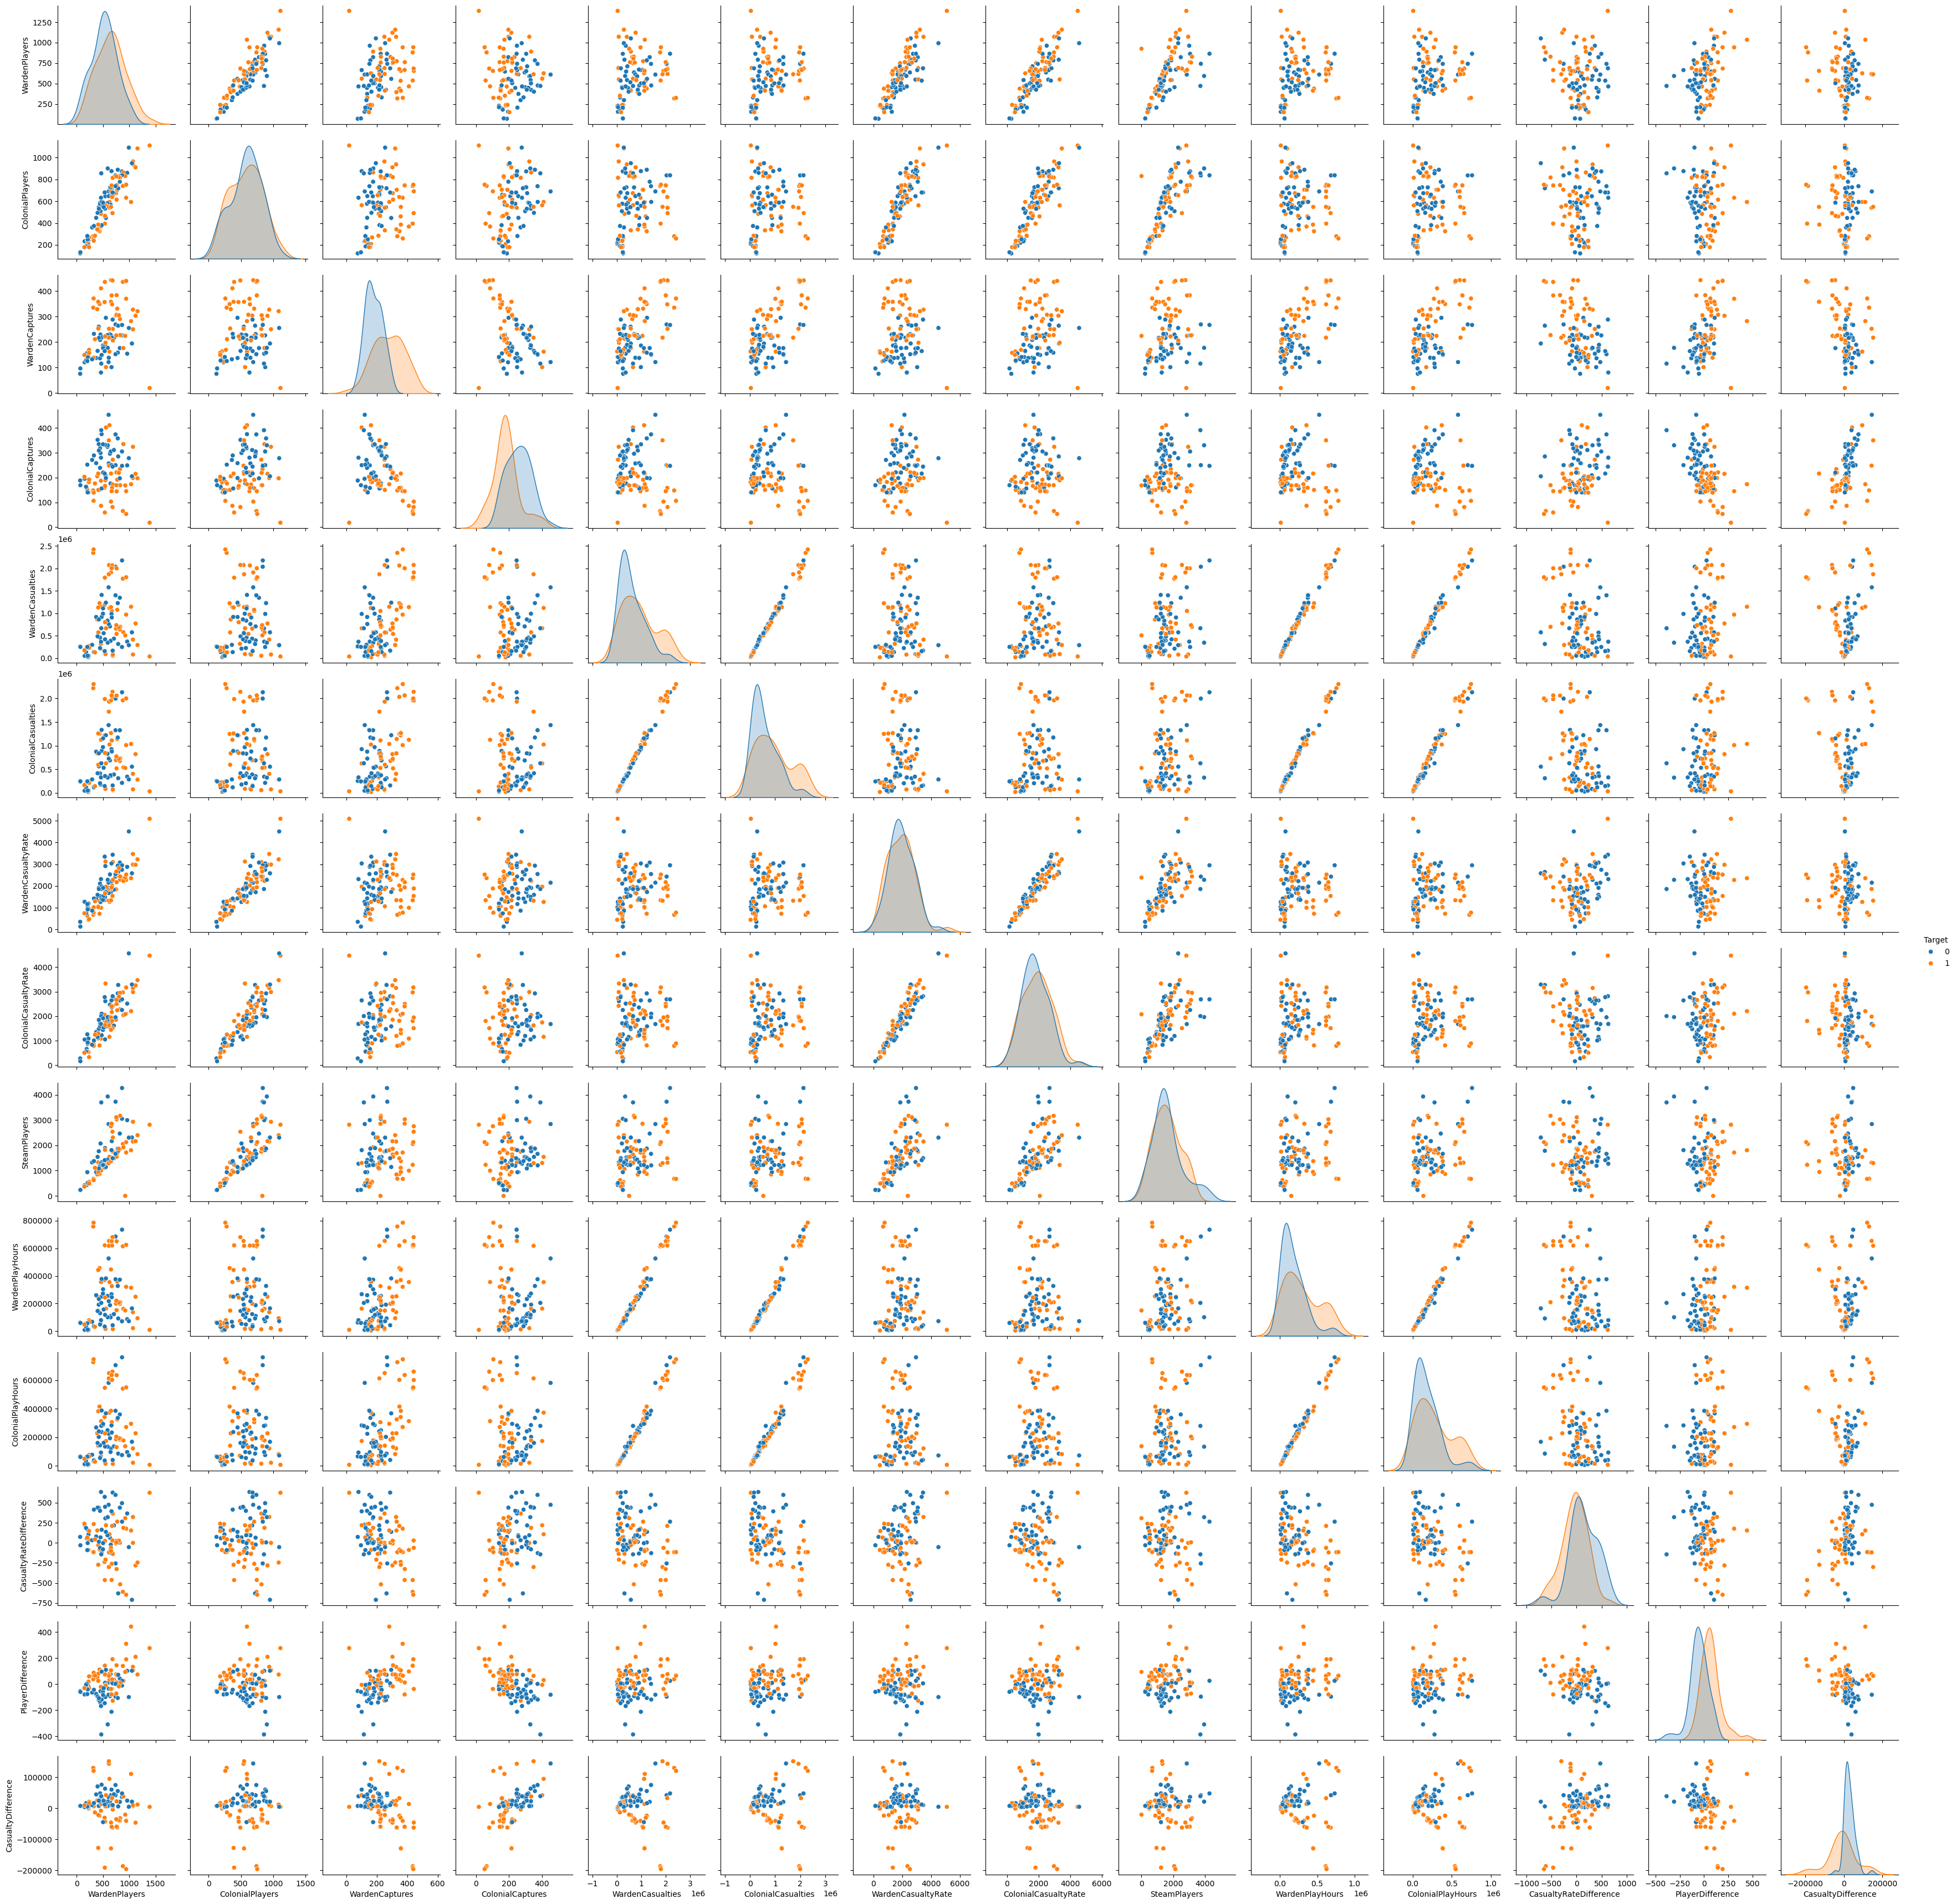

In [7]:
# --- Step 1: Create a smaller, random sample of the data ---
df_sample4 = df4.sample(n=100)

# --- Step 2: Drop 'WarNumber' and 'Timestamp' from the sample ---
df_for_plot4 = df_sample4.drop(columns=['WarNumber', 'Timestamp'])

# --- Step 3: Generate the pair plot using the smaller sample ---
sns.pairplot(df_for_plot4, hue='Target')
plt.show()

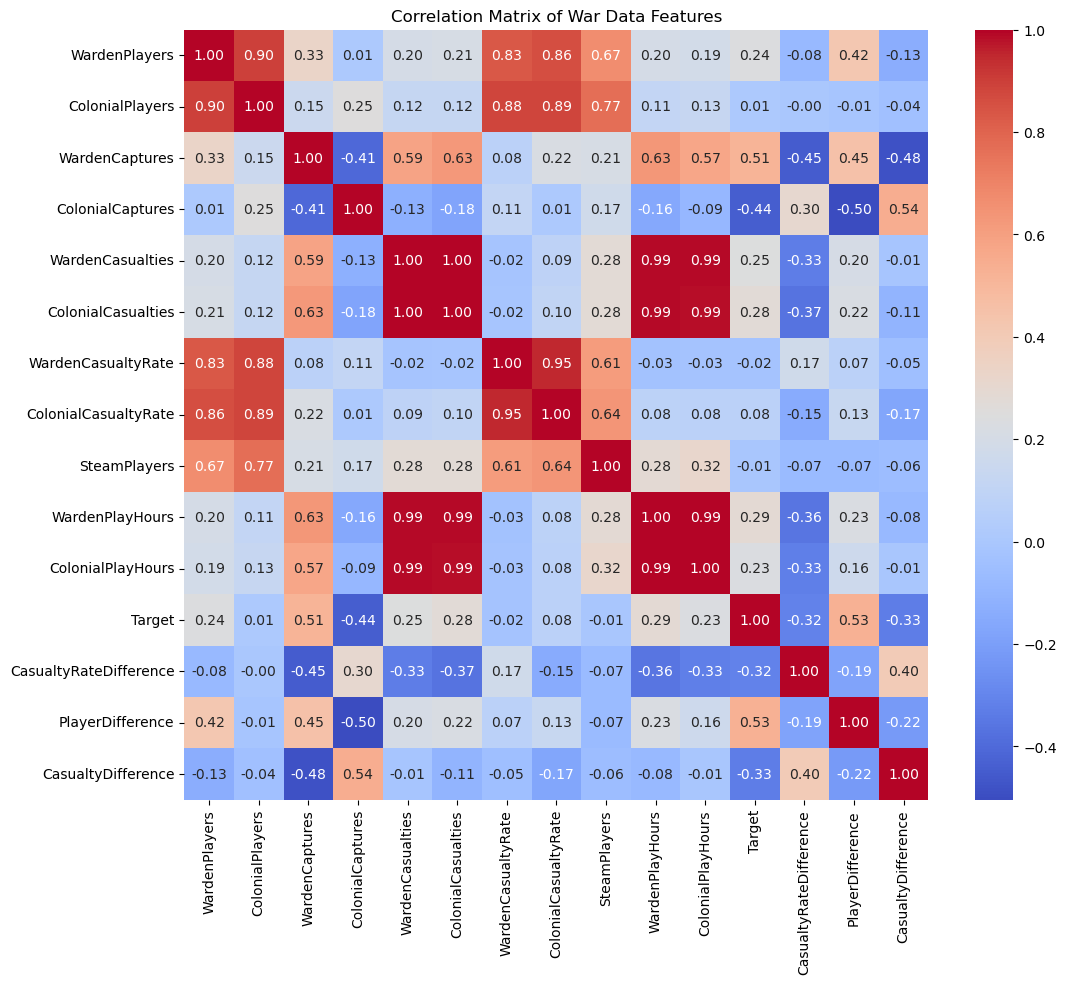

In [8]:
# --- 1. Calculate the Correlation Matrix ---
# The .corr() method calculates the Pearson correlation between all numeric columns
corr_matrix = df_for_plot4.corr()

# --- 2. Create the Heatmap ---
# We make the figure larger for better readability
plt.figure(figsize=(12, 10))

# sns.heatmap() is used to visualize the matrix
# annot=True writes the correlation values in each cell
# cmap='coolwarm' is a good color scheme where red is positive and blue is negative
# fmt='.2f' formats the numbers to two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot
plt.title('Correlation Matrix of War Data Features')

# Display the plot
plt.show()

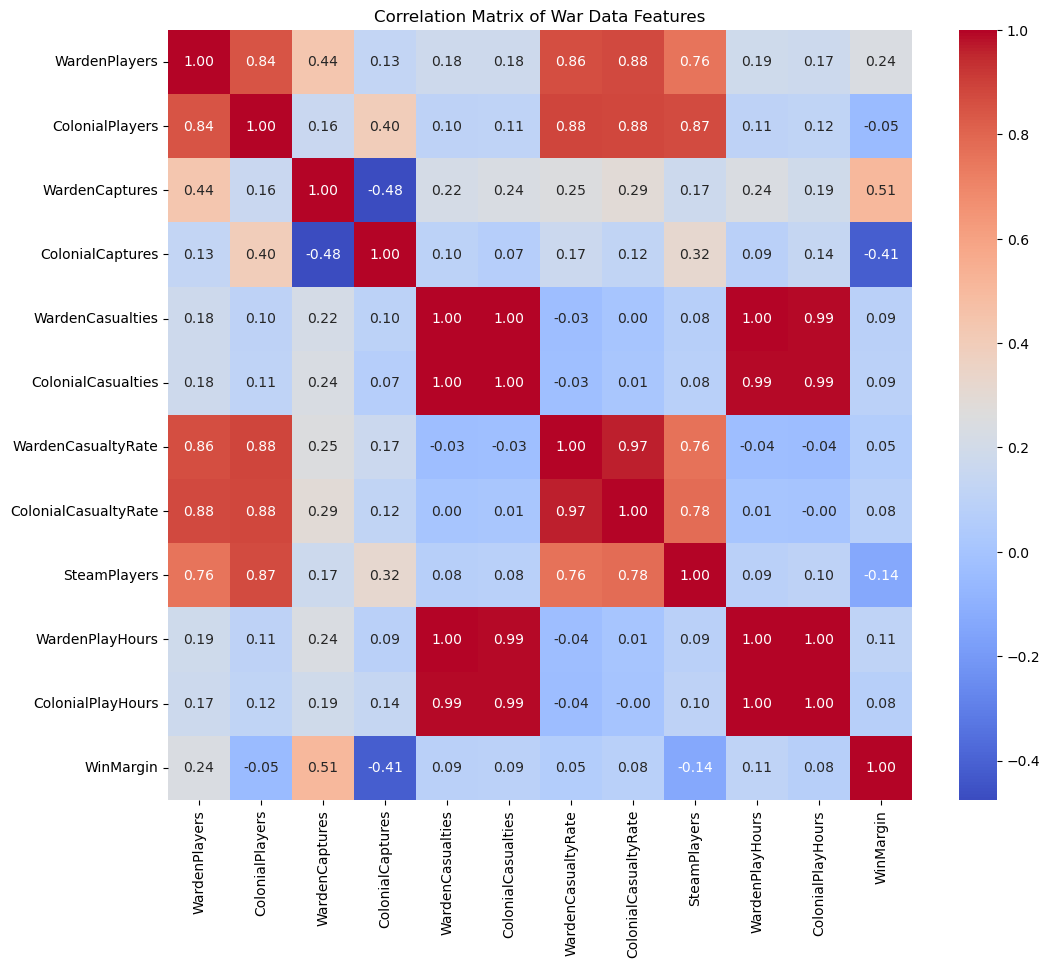

In [9]:
# --- 1. Calculate the Correlation Matrix ---
# The .corr() method calculates the Pearson correlation between all numeric columns
corr_matrix = df_for_plot3.corr()

# --- 2. Create the Heatmap ---
# We make the figure larger for better readability
plt.figure(figsize=(12, 10))

# sns.heatmap() is used to visualize the matrix
# annot=True writes the correlation values in each cell
# cmap='coolwarm' is a good color scheme where red is positive and blue is negative
# fmt='.2f' formats the numbers to two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot
plt.title('Correlation Matrix of War Data Features')

# Display the plot
plt.show()


Training Random Forest model...
Model training complete.


C:\Users\Aidan\AppData\Local\Temp\ipykernel_3204\2529127066.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


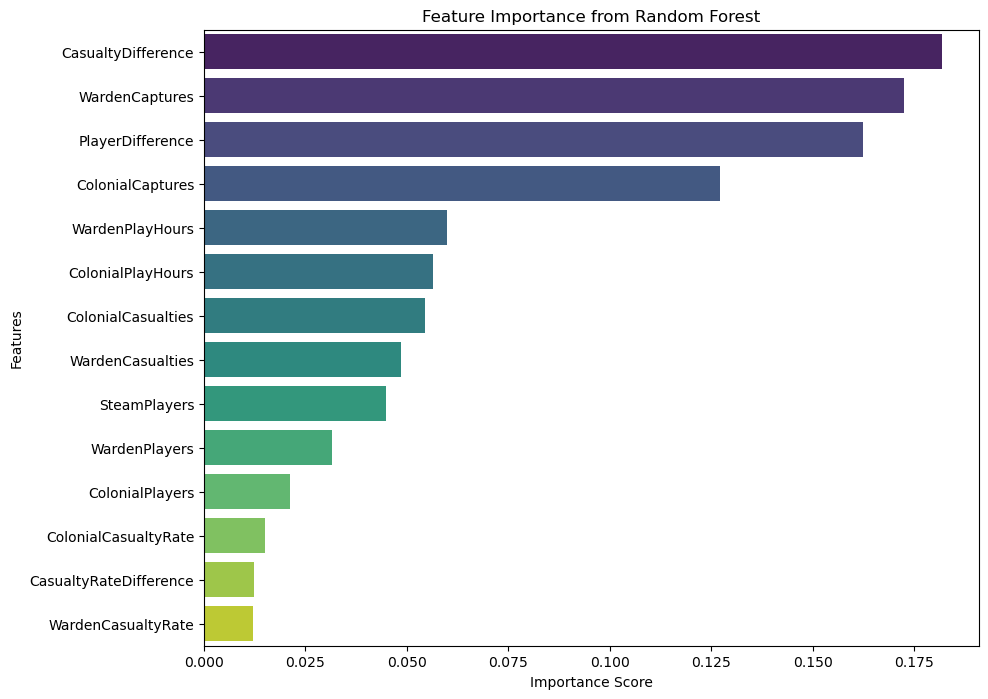

In [10]:

# --- 1. Prepare Data for Modeling ---
# Ensure your DataFrame has the binary 'Target' column for classification
if 'Target' not in df4.columns:
    print("❌ Error: 'Target' column not found. This script is for the classification setup.")
else:
    # Define features (X) and target (y)
    target_column = 'Target'
    # Drop non-predictive columns to create the feature set
    features_to_drop = ['WarNumber', 'Timestamp', target_column]
    X = df4.drop(columns=features_to_drop)
    y = df4[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # --- 2. Train a Random Forest Model ---
    # We use a Random Forest because it's powerful and calculates feature importances.
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    print("\nTraining Random Forest model...")
    model.fit(X_train, y_train)
    print("Model training complete.")

    # --- 3. Get and Process Feature Importances ---
    # Extract the importance scores from the trained model
    importances = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for easy sorting and plotting
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # --- 4. Create the Feature Importance Graph ---
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()



Training Random Forest Regressor model...
Model training complete.


C:\Users\Aidan\AppData\Local\Temp\ipykernel_3204\2860798649.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


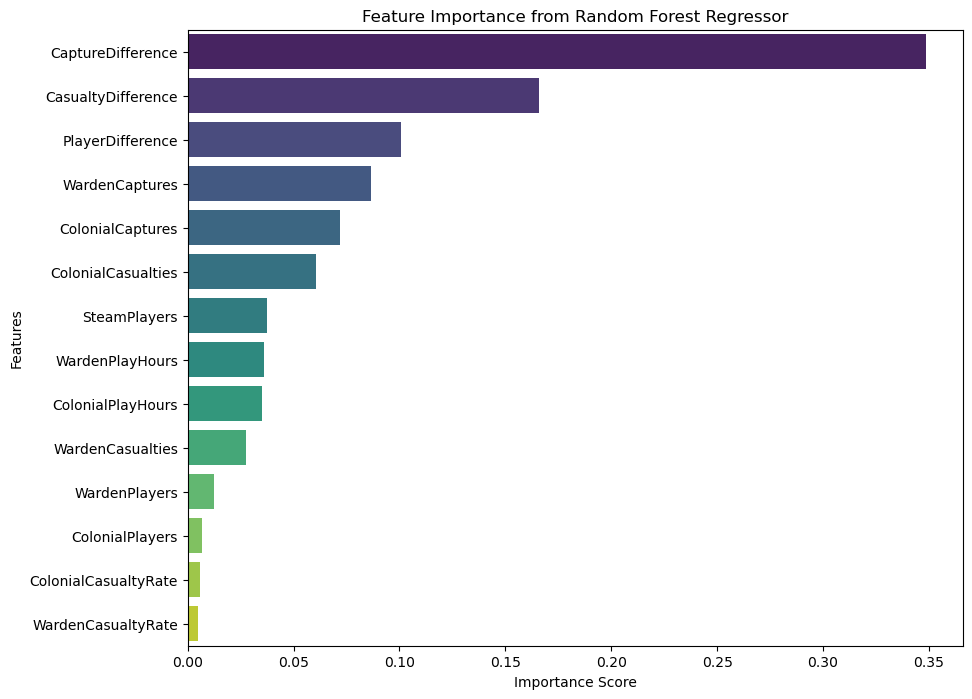

In [11]:
# --- 2. Prepare Data for Modeling ---
# Create the difference features
df3['CaptureDifference'] = df3['WardenCaptures'] - df3['ColonialCaptures']
df3['CasualtyDifference'] = df3['WardenCasualties'] - df3['ColonialCasualties']
df3['PlayerDifference'] = df3['WardenPlayers'] - df3['ColonialPlayers']

# Define features (X) and target (y) for regression
# We assume the target column for regression is 'WinMargin'
target_column = 'WinMargin'

if target_column not in df3.columns:
    print(f"❌ Error: Target column '{target_column}' not found in the DataFrame.")
    exit()

features_to_drop = ['WarNumber', 'Timestamp', target_column]
X = df3.drop(columns=features_to_drop)
y = df3[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Train a Random Forest Regressor Model ---
# Note: We use RandomForestRegressor because the target is a continuous number.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTraining Random Forest Regressor model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Get and Process Feature Importances ---
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting and plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# --- 5. Create the Feature Importance Graph ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [12]:
!pip install shap

In [13]:
import shap

# --- 2. Prepare Data for Modeling ---
# Create the difference features
df4['CaptureDifference'] = df4['WardenCaptures'] - df4['ColonialCaptures']
df4['CasualtyDifference'] = df4['WardenCasualties'] - df4['ColonialCasualties']
df4['PlayerDifference'] = df4['WardenPlayers'] - df4['ColonialPlayers']

# Define features (X) and target (y)
target_column = 'Target'
if target_column not in df4.columns:
    print(f"❌ Error: Target column '{target_column}' not found in df4.")
    exit()

features_to_drop = ['WarNumber', 'Timestamp', target_column]
X = df4.drop(columns=features_to_drop)
y = df4[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Train a Random Forest Classifier ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTraining Random Forest Classifier model...")
model.fit(X_train, y_train)
print("Model training complete.")



Training Random Forest Classifier model...
Model training complete.


In [14]:
# --- 2. Prepare Data for Modeling ---
# Create the difference features
df4['CaptureDifference'] = df4['WardenCaptures'] - df4['ColonialCaptures']
df4['CasualtyDifference'] = df4['WardenCasualties'] - df4['ColonialCasualties']
df4['PlayerDifference'] = df4['WardenPlayers'] - df4['ColonialPlayers']

# Define features (X) and target (y)
target_column = 'Target'
if target_column not in df4.columns:
    print(f"❌ Error: Target column '{target_column}' not found in df4.")
    exit()

features_to_drop = ['WarNumber', 'Timestamp', target_column]
X = df4.drop(columns=features_to_drop)
y = df4[target_column]

# --- SAFEGUARD: Ensure all features are numeric ---
# This is the key fix. We select only columns with number-like data types.
X_numeric = X.select_dtypes(include=np.number)

# Split data into training and testing sets using the numeric-only features
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# --- 3. Train a Random Forest Classifier ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTraining Random Forest Classifier model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Calculate SHAP Values ---
explainer = shap.TreeExplainer(model)
print("\nCalculating SHAP values...")
# We use the same X_test (numeric only) that the model was trained on
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated.")

# --- 5. Create the SHAP Summary Plot ---
print("Generating SHAP summary plot...")
# The shapes will now match because X_test and the shap_values are based on the same set of numeric columns
shap.summary_plot(shap_values[1], X_test)


Training Random Forest Classifier model...
Model training complete.

Calculating SHAP values...
SHAP values calculated.
Generating SHAP summary plot...


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.